<a href="https://colab.research.google.com/github/shbnm93/Data-Science-Projects/blob/main/Logistic_regression_student.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

%matplotlib inline

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, accuracy_score, roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler

In [ ]:
url = 'https://raw.githubusercontent.com/Zekeriyabesiroglu/DSBootCampOct21/main/curriculum/project03/logistic-regression/ny_sf_apt.csv?token=GHSAT0AAAAAABSFR4MUQ4VW4ON37OMOQXEAYTKLDSQ'
df_housing = pd.read_csv (url)
df_housing

,in_sf,beds,bath,price,year_built,sqft,price_per_sqft,elevation
0,0,2.0,1.0,999000,1960,1000,999,10
1,0,2.0,2.0,2750000,2006,1418,1939,0
2,0,2.0,2.0,1350000,1900,2150,628,9
3,0,1.0,1.0,629000,1903,500,1258,9
4,0,0.0,1.0,439000,1930,500,878,10
...,...,...,...,...,...,...,...,...
487,1,5.0,2.5,1800000,1890,3073,586,76
488,1,2.0,1.0,695000,1923,1045,665,106
489,1,3.0,2.0,1650000,1922,1483,1113,106
490,1,1.0,1.0,649000,1983,850,764,163


Our goal is to predict whether or not the house is in_sf or not (if it is not in SF, it is in NY). Before going any further, let's do our test-train split:

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df_housing.iloc[:, 1:], df_housing.iloc[:, 0],
                                                    test_size = 0.2, random_state=42)

In [ ]:
df_housing.iloc[:, 1:]

,beds,bath,price,year_built,sqft,price_per_sqft,elevation
0,2.0,1.0,999000,1960,1000,999,10
1,2.0,2.0,2750000,2006,1418,1939,0
2,2.0,2.0,1350000,1900,2150,628,9
3,1.0,1.0,629000,1903,500,1258,9
4,0.0,1.0,439000,1930,500,878,10
...,...,...,...,...,...,...,...
487,5.0,2.5,1800000,1890,3073,586,76
488,2.0,1.0,695000,1923,1045,665,106
489,3.0,2.0,1650000,1922,1483,1113,106
490,1.0,1.0,649000,1983,850,764,163


In [ ]:
df_housing.iloc[:, 0]

0      0
1      0
2      0
3      0
4      0
      ..
487    1
488    1
489    1
490    1
491    1
Name: in_sf, Length: 492, dtype: int64

In [ ]:
# Ok, which feature looks promising? We'll restrict ourselves to one for now
train_df = X_train.copy()
train_df['in_sf'] = y_train

train_df['location'] = train_df['in_sf'].apply(lambda x: (x and 'SF') or 'NY')
train_df.head()

,beds,bath,price,year_built,sqft,price_per_sqft,elevation,in_sf,location
377,3.0,2.0,2395000,1929,2323,1031,73,1,SF
124,0.0,1.0,349000,1960,400,873,13,0,NY
419,4.0,3.0,3420000,1926,5113,669,98,1,SF
417,6.0,3.5,995000,2001,3080,323,55,1,SF
172,2.0,2.0,1599000,1973,1400,1142,10,0,NY


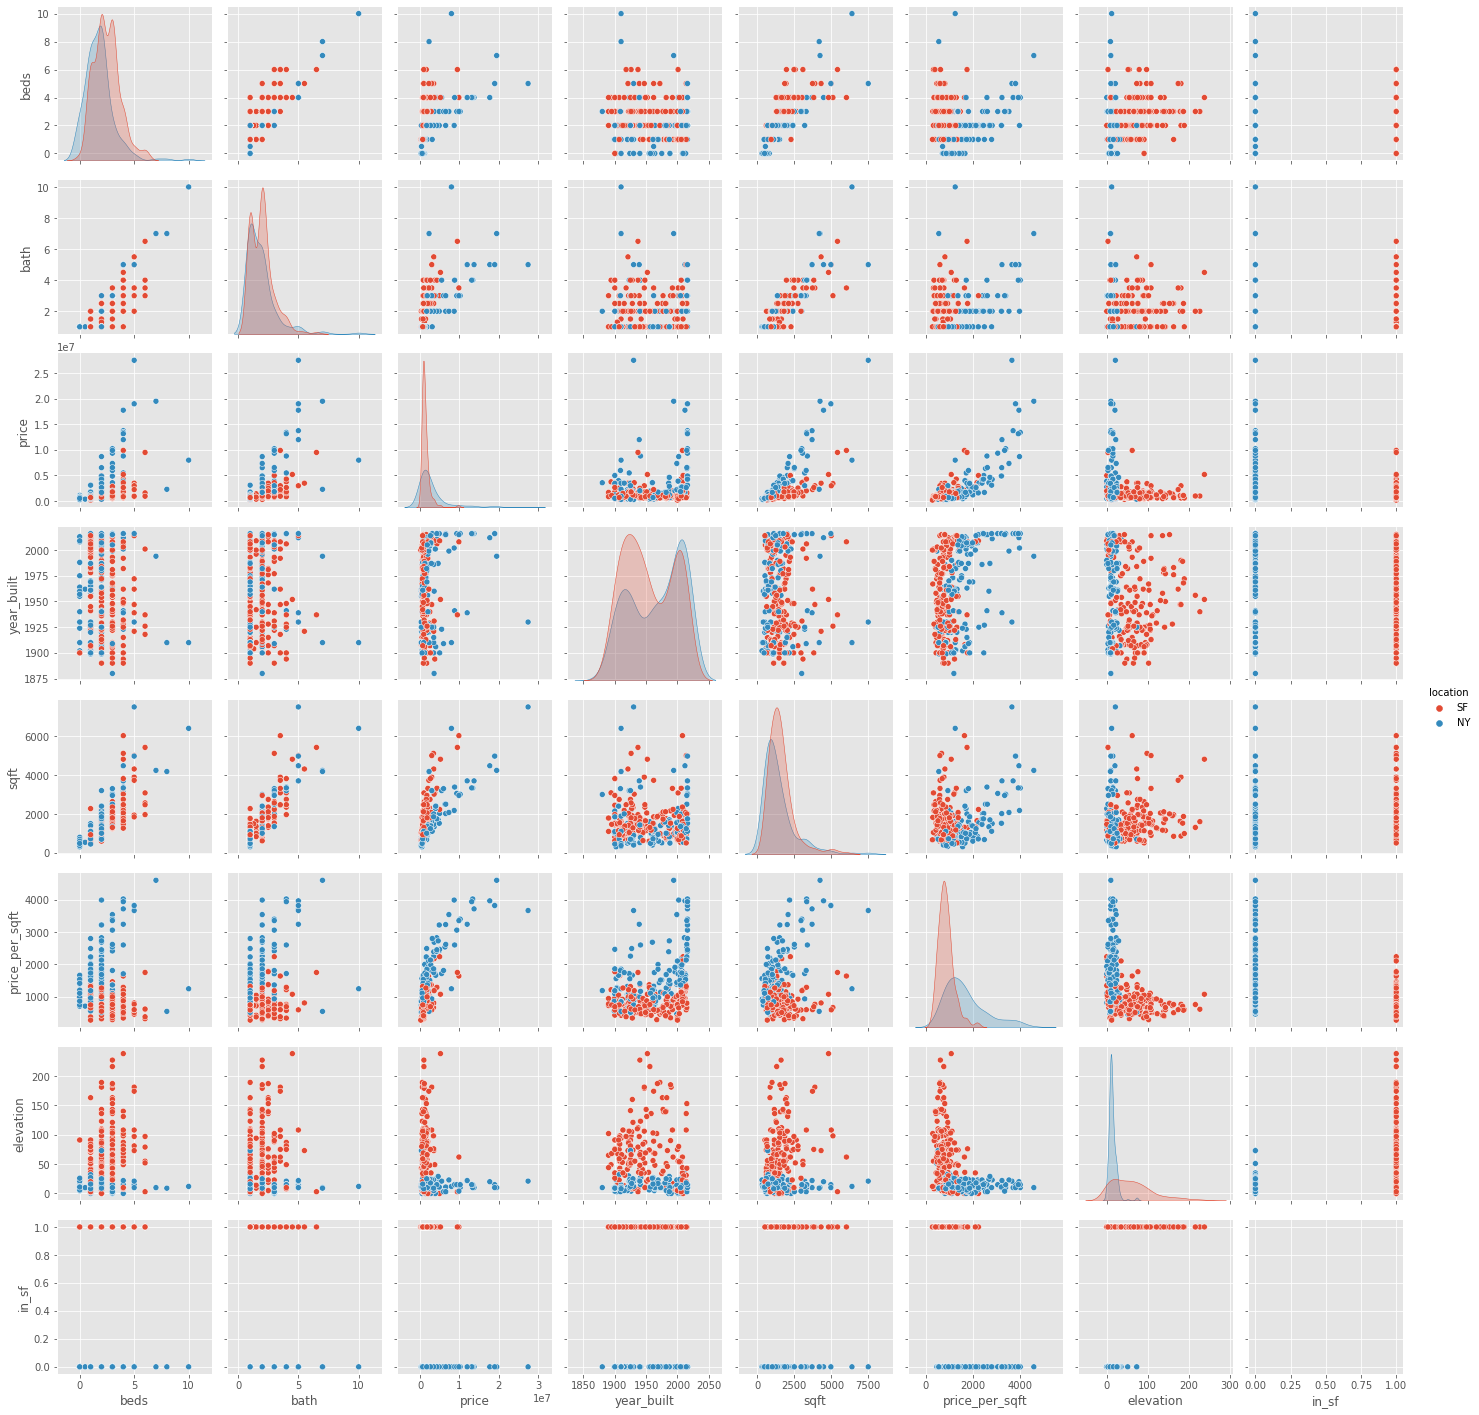

In [ ]:
# We want to pick one feature to start that separates the two cases.
# Look down the diagonal to find a covariate that separates the data well

sns.pairplot(train_df, hue='location');

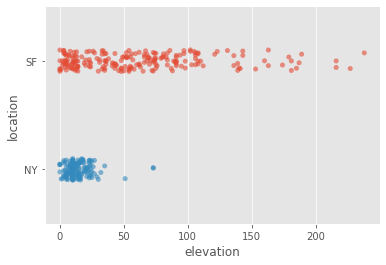

In [ ]:
sns.stripplot(x='elevation',y='location', jitter=True,data=train_df,alpha=0.6);

# **Enter logistic regression**
Because there is only one feature (elevation) that we are looking at right now, applying the standard scaler is superflous. To keep our results interpretable, we will stay with the unscaled elevation as a feature.

In [ ]:
lm1 = LogisticRegression(solver= 'liblinear', C=1000)
lm1.fit(X_train[['elevation']], y_train)

LogisticRegression(C=1000, solver='liblinear')

In [ ]:
lm1.score(X_train[['elevation']], y_train)

0.8040712468193384

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  "X does not have valid feature names, but"


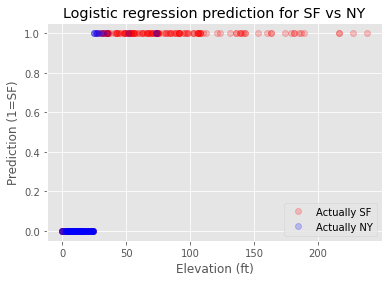

In [ ]:
# Let's look at what lm1 did
feature = train_df[['elevation']].values
prediction_hard = lm1.predict(feature)

sf_mask = (train_df['location'] == 'SF').values

plt.plot(feature[sf_mask], prediction_hard[sf_mask], 'ro', label='Actually SF', alpha=0.2)
plt.plot(feature[~sf_mask], prediction_hard[~sf_mask], 'bo', label='Actually NY', alpha=0.2)
plt.ylim(-0.05, 1.05)
plt.xlabel('Elevation (ft)')
plt.ylabel('Prediction (1=SF)')
plt.title('Logistic regression prediction for SF vs NY')
plt.legend(loc='lower right');

The logistic regression has basically made a hard cutoff around 25 ft: lower than that, the prediction is you are in NY. Higher than that, the model predicts you are in SF. This is called a hard cutoff.

Under the hood, logistic regression produces probabilities, and chooses the most likely one as the prediction. We can also look at the model's probability of assigning a point to SF:

In [ ]:
# choose different values of elevation; output is their probability of being in SF
lm1.predict_proba([[73],[23],[25]])[:,1]

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  "X does not have valid feature names, but"


array([0.96445639, 0.48096024, 0.51471678])

In [ ]:
lm1.predict_proba([[73],[23],[25]])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  "X does not have valid feature names, but"


array([[0.03554361, 0.96445639],
       [0.51903976, 0.48096024],
       [0.48528322, 0.51471678]])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  "X does not have valid feature names, but"


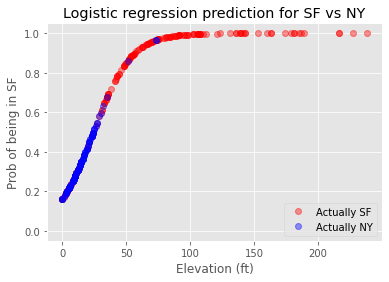

In [ ]:
# This is the same model but with proba (returns probabilities instead of class)
prediction_soft = lm1.predict_proba(feature)[:, 1]

plt.plot(feature[sf_mask], prediction_soft[sf_mask], 'ro', label='Actually SF',alpha=0.4)
plt.plot(feature[~sf_mask], prediction_soft[~sf_mask], 'bo', label='Actually NY',alpha=0.4)
plt.ylim(-0.05, 1.05)
plt.xlabel('Elevation (ft)')
plt.ylabel('Prob of being in SF')
plt.title('Logistic regression prediction for SF vs NY')
plt.legend(loc='lower right');

This is called a soft classification, because we don't just get access to what the model is thinks is the most likely outcome, but we also get to know how likely it thinks the prediction is.

In [ ]:
# Look at the coefficient and intercept of the model:
lm1.coef_, lm1.intercept_

(array([[0.06754]]), array([-1.62961593]))

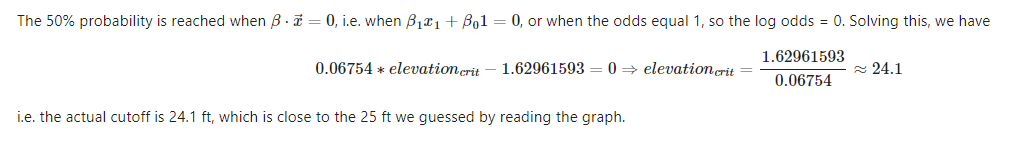

# Error type
What types of errors is this model making? From the graph, it looks like we are getting almost all the SF apartments right, and that our errors are coming from classifying some NY houses as SF houses. We are going to use the hard predictions to check with confusion_matrix

In [ ]:
confusion_matrix(y_train, prediction_hard)

array([[168,  13],
       [ 64, 148]])

In [ ]:
# Out of those in SF, how many were predicted to be NY?
sum(prediction_hard[sf_mask] == 0)

64

Our plotting order mattered and mislead us (or at least, mislead me!)

Cheating
For the purposes of demonstration, what would happen if we

throw out all SF apartments that have elevations less than 24 ft AND
throw out all NY apartments that have elevations greater than 24 ft
from our training set? This shouldn't change the decision point much .... so what will it change?

In [ ]:
# This is to explore a model
# This is NOT legitimate data science!
keep_sf_mask = ((train_df['location'] == 'SF') & (train_df['elevation'] > 24))
keep_ny_mask = ((train_df['location'] == 'NY') & (train_df['elevation'] < 24))
cheat_df = train_df[keep_sf_mask | keep_ny_mask]

In [ ]:
cheat_df

,beds,bath,price,year_built,sqft,price_per_sqft,elevation,in_sf,location
377,3.0,2.0,2395000,1929,2323,1031,73,1,SF
124,0.0,1.0,349000,1960,400,873,13,0,NY
419,4.0,3.0,3420000,1926,5113,669,98,1,SF
417,6.0,3.5,995000,2001,3080,323,55,1,SF
172,2.0,2.0,1599000,1973,1400,1142,10,0,NY
...,...,...,...,...,...,...,...,...,...
71,2.0,2.0,2650000,2014,1240,2137,18,0,NY
106,1.0,1.0,695000,1961,720,965,16,0,NY
270,1.0,1.0,699000,1907,932,750,59,1,SF
348,4.0,4.0,2650000,1900,3816,694,75,1,SF


In [ ]:
lm2 = LogisticRegression(solver='liblinear')
lm2.fit(cheat_df[['elevation']], cheat_df['in_sf'])

LogisticRegression(solver='liblinear')

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  "X does not have valid feature names, but"


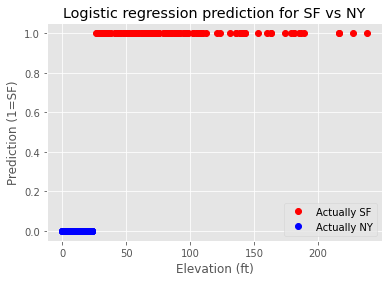

In [ ]:
# Plot the 'hard' classifier. What do we expect to happen?
feature = cheat_df[['elevation']].values
prediction_hard = lm1.predict(feature)

sf_mask = (cheat_df['location'] == 'SF').values

plt.plot(feature[sf_mask], prediction_hard[sf_mask], 'ro', label='Actually SF')
plt.plot(feature[~sf_mask], prediction_hard[~sf_mask], 'bo', label='Actually NY')
plt.ylim(-0.05, 1.05)
plt.xlabel('Elevation (ft)')
plt.ylabel('Prediction (1=SF)')
plt.title('Logistic regression prediction for SF vs NY')
plt.legend(loc='lower right');